In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("/kaggle/input/oporto-taxi-and-weather-2013-2014/taxiweather_data.csv")

In [5]:
from datetime import *

hours = [int(datetime.fromtimestamp(i).hour) + round(float(datetime.fromtimestamp(i).minute)/60, 3) for i in data["TIMESTAMP"]]
data["HOUR"] = hours

In [6]:
X = [eval(i)[0] for i in data["START"]]
data["X"] = X

Y = [eval(i)[1] for i in data["START"]]
data["Y"] = Y


data.drop(["START", "Unnamed: 0.1", "Unnamed: 0", "DATE", "date_time"], axis=1, inplace=True)

data.head()

,TIMESTAMP,WEEKDAY,DAYOFYEAR,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,...,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,HOUR,X,Y
0,1372636858,Monday,182,16,4,0.0,8.7,3,3,40,...,80,0.0,1023,16,10,179,4,0.000,-8.618643,41.141412
1,1372637303,Monday,182,16,4,0.0,8.7,3,3,40,...,80,0.0,1023,16,10,179,4,0.133,-8.639847,41.159826
2,1372636951,Monday,182,16,4,0.0,8.7,3,3,40,...,80,0.0,1023,16,10,179,4,0.033,-8.612964,41.140359
3,1372636854,Monday,182,16,4,0.0,8.7,3,3,40,...,80,0.0,1023,16,10,179,4,0.000,-8.574678,41.151951
4,1372637091,Monday,182,16,4,0.0,8.7,3,3,40,...,80,0.0,1023,16,10,179,4,0.067,-8.645994,41.180490


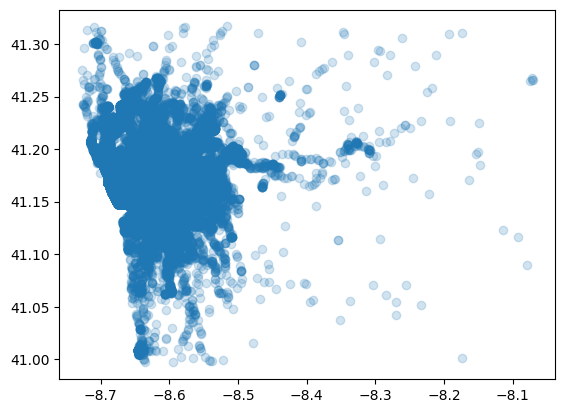

,TIMESTAMP,DAYOFYEAR,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,...,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,HOUR,X,Y
count,1.703897e+06,1.703897e+06,1.703897e+06,1.703897e+06,1703897.0,1.703897e+06,1.703897e+06,1.703897e+06,1.703897e+06,1.703897e+06,...,1.703897e+06,1.703897e+06,1.703897e+06,1.703897e+06,1.703897e+06,1.703897e+06,1.703897e+06,1.703897e+06,1.703897e+06,1.703897e+06
mean,1.388621e+09,1.847336e+02,2.459818e+01,1.448523e+01,0.0,1.019265e+01,5.039556e+00,5.039556e+00,4.473698e+01,1.537816e+01,...,7.957531e+01,1.890120e+00,1.015507e+03,2.459818e+01,8.853012e+00,1.718292e+02,1.147320e+01,1.241959e+01,-8.617367e+00,4.115712e+01
std,9.179991e+06,1.043776e+02,6.236917e+00,5.020199e+00,0.0,3.044166e+00,1.201690e+00,1.201690e+00,3.125743e+01,4.383998e+00,...,8.286960e+00,4.646604e+00,5.156283e+00,6.236917e+00,1.316629e+00,6.957788e+01,4.020516e+00,6.240669e+00,2.534006e-02,1.324042e-02
min,1.372637e+09,1.000000e+00,9.000000e+00,1.000000e+00,0.0,3.800000e+00,2.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,...,5.300000e+01,0.000000e+00,1.002000e+03,9.000000e+00,4.000000e+00,2.100000e+01,3.000000e+00,0.000000e+00,-8.727588e+00,4.099707e+01
25%,1.380731e+09,9.600000e+01,2.100000e+01,1.100000e+01,0.0,8.700000e+00,4.000000e+00,4.000000e+00,1.600000e+01,1.300000e+01,...,7.500000e+01,0.000000e+00,1.011000e+03,2.100000e+01,8.000000e+00,1.090000e+02,9.000000e+00,7.900000e+00,-8.628831e+00,4.114787e+01
50%,1.388490e+09,1.820000e+02,2.500000e+01,1.500000e+01,0.0,1.150000e+01,5.000000e+00,5.000000e+00,4.300000e+01,1.600000e+01,...,8.000000e+01,0.000000e+00,1.015000e+03,2.500000e+01,9.000000e+00,1.680000e+02,1.100000e+01,1.260000e+01,-8.612739e+00,4.115436e+01
75%,1.396748e+09,2.760000e+02,2.900000e+01,1.800000e+01,0.0,1.300000e+01,6.000000e+00,6.000000e+00,7.200000e+01,1.900000e+01,...,8.500000e+01,1.200000e+00,1.019000e+03,2.900000e+01,1.000000e+01,2.290000e+02,1.400000e+01,1.738300e+01,-8.603613e+00,4.116320e+01
max,1.404173e+09,3.650000e+02,4.000000e+01,2.500000e+01,0.0,1.410000e+01,8.000000e+00,8.000000e+00,1.000000e+02,2.300000e+01,...,9.700000e+01,3.320000e+01,1.030000e+03,4.000000e+01,1.000000e+01,3.300000e+02,3.000000e+01,2.398300e+01,-8.070588e+00,4.131660e+01


In [7]:
from scipy import stats

def remove_outliers(df, col, threshold=3):
    z_scores = stats.zscore(df[col])
    abs_z_scores = abs(z_scores)
    return df[(abs_z_scores < threshold)]

data = remove_outliers(data, "X", 9)
data = remove_outliers(data, "Y", 9)

plt.scatter(data["X"], data["Y"], alpha=0.2)
plt.show()

data.describe()

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        encoder = OneHotEncoder()
        
        matrix = encoder.fit_transform(X[["WEEKDAY"]]).toarray()
        column_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        return X

In [9]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(["TIMESTAMP", "WEEKDAY", "totalSnow_cm", "uvIndex.1", "moon_illumination", "moonrise", "moonset", "sunrise", "sunset", "DewPointC", "WindChillC", "pressure", "tempC", "winddirDegree"], axis=1, errors="ignore")

In [10]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("featureencoder", FeatureEncoder()), ("featuredropper", FeatureDropper())])
data = pipeline.fit_transform(data)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = data.drop(["X", "Y"], axis=1)
y = data[["X", "Y"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1703897 entries, 0 to 1704768
Data columns (total 23 columns):
 #   Column         Dtype  
---  ------         -----  
 0   DAYOFYEAR      int64  
 1   maxtempC       int64  
 2   mintempC       int64  
 3   sunHour        float64
 4   uvIndex        int64  
 5   FeelsLikeC     int64  
 6   HeatIndexC     int64  
 7   WindGustKmph   int64  
 8   cloudcover     int64  
 9   humidity       int64  
 10  precipMM       float64
 11  visibility     int64  
 12  windspeedKmph  int64  
 13  HOUR           float64
 14  X              float64
 15  Y              float64
 16  Monday         float64
 17  Tuesday        float64
 18  Wednesday      float64
 19  Thursday       float64
 20  Friday         float64
 21  Saturday       float64
 22  Sunday         float64
dtypes: float64(12), int64(11)
memory usage: 312.0 MB


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(2)  # Output layer with 2 neurons for latitude and longitude
])

2024-03-18 19:30:35.010948: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-18 19:30:35.011112: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-18 19:30:35.178287: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam',
              loss='mse',  # Mean Squared Error loss for regression
              metrics=['mae'])  # Mean Absolute Error metric for evaluation

In [13]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
  100/34078 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - loss: 707.6367 - mae: 21.9559  

I0000 00:00:1710790254.903526     122 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


34078/34078 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - loss: 11.6428 - mae: 0.6615 - val_loss: 0.0044 - val_mae: 0.0484
Epoch 2/50
34078/34078 ━━━━━━━━━━━━━━━━━━━━ 64s 2ms/step - loss: 0.0052 - mae: 0.0486 - val_loss: 0.0082 - val_mae: 0.0644
Epoch 3/50
34078/34078 ━━━━━━━━━━━━━━━━━━━━ 63s 2ms/step - loss: 0.0041 - mae: 0.0445 - val_loss: 0.0067 - val_mae: 0.0576
Epoch 4/50
34078/34078 ━━━━━━━━━━━━━━━━━━━━ 63s 2ms/step - loss: 0.0032 - mae: 0.0397 - val_loss: 0.0030 - val_mae: 0.0426
Epoch 5/50
34078/34078 ━━━━━━━━━━━━━━━━━━━━ 63s 2ms/step - loss: 0.0028 - mae: 0.0373 - val_loss: 0.0029 - val_mae: 0.0410
Epoch 6/50
34078/34078 ━━━━━━━━━━━━━━━━━━━━ 63s 2ms/step - loss: 0.0024 - mae: 0.0351 - val_loss: 0.0026 - val_mae: 0.0382
Epoch 7/50
34078/34078 ━━━━━━━━━━━━━━━━━━━━ 62s 2ms/step - loss: 0.0021 - mae: 0.0332 - val_loss: 0.0011 - val_mae: 0.0274
Epoch 8/50
34078/34078 ━━━━━━━━━━━━━━━━━━━━ 63s 2ms/step - loss: 0.0019 - mae: 0.0321 - val_loss: 0.0014 - val_mae: 0.0311
Epoch 9/50
34078/34078 ━━━

In [14]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print('Test loss: ', test_loss)
print('Test MAE: ', test_mae)

10650/10650 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 8.1987e-04 - mae: 0.0223
Test loss:  0.000824897491838783
Test MAE:  0.022349795326590538
